In [12]:
import os
import sys
sys.path.insert(0, os.path.abspath('../../'))

import numpy as np
from matplotlib import pyplot as plt
import h5py
import arrayfire as af

from dg_maxwell import params
from dg_maxwell import msh_parser
from dg_maxwell import lagrange
from dg_maxwell import global_variables as gvar

af.set_backend(params.backend)
af.set_device(params.device)

plt.rcParams['figure.figsize']     = 12, 7.5
plt.rcParams['lines.linewidth']    = 1.5
plt.rcParams['font.family']        = 'serif'
plt.rcParams['font.weight']        = 'bold'
plt.rcParams['font.size']          = 20  
plt.rcParams['font.sans-serif']    = 'serif'
plt.rcParams['text.usetex']        = True
plt.rcParams['axes.linewidth']     = 1.5
plt.rcParams['axes.titlesize']     = 'medium'
plt.rcParams['axes.labelsize']     = 'medium'

plt.rcParams['xtick.major.size']   = 8
plt.rcParams['xtick.minor.size']   = 4
plt.rcParams['xtick.major.pad']    = 8
plt.rcParams['xtick.minor.pad']    = 8
plt.rcParams['xtick.color']        = 'k'
plt.rcParams['xtick.labelsize']    = 'medium'
plt.rcParams['xtick.direction']    = 'in'    

plt.rcParams['ytick.major.size']   = 8
plt.rcParams['ytick.minor.size']   = 4
plt.rcParams['ytick.major.pad']    = 8
plt.rcParams['ytick.minor.pad']    = 8
plt.rcParams['ytick.color']        = 'k'
plt.rcParams['ytick.labelsize']    = 'medium'
plt.rcParams['ytick.direction']    = 'in'
plt.rcParams['text.usetex']        = True
plt.rcParams['text.latex.unicode'] = True

In [13]:
params.mesh_file = '../read_and_plot_mesh/mesh/particle_in_rectangle.msh'
advec_var = gvar.advection_variables(params.N_LGL, params.N_quad,
                                     params.x_nodes, params.N_Elements,
                                     params.c, params.total_time, params.wave,
                                     params.c_x, params.c_y, params.courant,
                                     params.mesh_file, params.total_time_2d)

/home/ubermensch/.local/anaconda3/lib/python3.6/site-packages/numpy/lib/polynomial.py:1193: FutureWarning: In the future extra properties will not be copied across when constructing one poly1d from another
  other = poly1d(other)
/home/ubermensch/.local/anaconda3/lib/python3.6/site-packages/numpy/lib/polynomial.py:1220: FutureWarning: In the future extra properties will not be copied across when constructing one poly1d from another
  other = poly1d(other)


gmshTranslator: Initializing...
gmshTranslator: Mesh has 988 nodes.
gmshTranslator: Mesh has 374 elements.
gmshTranslator: Processed 1366 lines.
gmshTranslator: There are 1 physical groups available: 
gmshTranslator:      > 0
gmshTranslator: Parsing nodes
gmshTranslator: Parsing elements
gmshTranslator: No rules for elements... skipping elements.
gmshTranslator: Parsing nodes
gmshTranslator: No rules for nodes... skipping nodes.
gmshTranslator: Parsing elements
advection_variables __init__ completed


In [32]:
file = h5py.File('../../results/2d_hdf5_08/dump_timestep_000001.hdf5', 'r')

In [20]:
u_e_ij = af.np_to_af_array(file['u_i'][:])
# u_e_ij = advec_var.u_e_ij

In [21]:
def contour_x_y_u(element_tag, advec_var):
    '''
    Returns the x, y, and u mesh.
    '''
    u_mesh = af.moddims(u_e_ij[:, element_tag],
                        d0 = params.N_LGL, d1 = params.N_LGL)
    x_mesh = af.moddims(advec_var.x_e_ij[:, element_tag],
                        d0 = params.N_LGL, d1 = params.N_LGL)
    y_mesh = af.moddims(advec_var.y_e_ij[:, element_tag],
                        params.N_LGL, params.N_LGL)
    
    return x_mesh, y_mesh, u_mesh


In [22]:
u_left = np.zeros([11 * params.N_LGL, 10 * params.N_LGL])
x_left = np.zeros([11 * params.N_LGL, 10 * params.N_LGL])
y_left = np.zeros([11 * params.N_LGL, 10 * params.N_LGL])

for i in np.arange(11):
    for j in np.arange(10):
        element_tag = i * 10 + j
        x_mesh, y_mesh, u_mesh = contour_x_y_u(element_tag, advec_var)
        u_left[i * params.N_LGL : (i + 1) * params.N_LGL, j * params.N_LGL : (j + 1) * params.N_LGL] = np.array(af.flip(u_mesh, dim = 0))
        x_left[i * params.N_LGL : (i + 1) * params.N_LGL, j * params.N_LGL : (j + 1) * params.N_LGL] = np.array(x_mesh)
        y_left[i * params.N_LGL : (i + 1) * params.N_LGL, j * params.N_LGL : (j + 1) * params.N_LGL] = np.array(af.flip(y_mesh, dim = 0))
        
        print(element_tag, end = ',')
    print()


0,1,2,3,4,5,6,7,8,9,
10,11,12,13,14,15,16,17,18,19,
20,21,22,23,24,25,26,27,28,29,
30,31,32,33,34,35,36,37,38,39,
40,41,42,43,44,45,46,47,48,49,
50,51,52,53,54,55,56,57,58,59,
60,61,62,63,64,65,66,67,68,69,
70,71,72,73,74,75,76,77,78,79,
80,81,82,83,84,85,86,87,88,89,
90,91,92,93,94,95,96,97,98,99,
100,101,102,103,104,105,106,107,108,109,


In [23]:
u_bottom_right = np.zeros([6 * params.N_LGL, 10 * params.N_LGL])
x_bottom_right = np.zeros([6 * params.N_LGL, 10 * params.N_LGL])
y_bottom_right = np.zeros([6 * params.N_LGL, 10 * params.N_LGL])

for i in np.arange(6):
    for j in np.arange(10):
        element_tag = i * 10 + j + 115
        x_mesh, y_mesh, u_mesh = contour_x_y_u(element_tag, advec_var)
        u_bottom_right[i * params.N_LGL : (i + 1) * params.N_LGL, j * params.N_LGL : (j + 1) * params.N_LGL] = np.array(af.flip(u_mesh, dim = 0))
        x_bottom_right[i * params.N_LGL : (i + 1) * params.N_LGL, j * params.N_LGL : (j + 1) * params.N_LGL] = np.array(x_mesh)
        y_bottom_right[i * params.N_LGL : (i + 1) * params.N_LGL, j * params.N_LGL : (j + 1) * params.N_LGL] = np.array(af.flip(y_mesh, dim = 0))

        print(element_tag, end = ',')
    print()


115,116,117,118,119,120,121,122,123,124,
125,126,127,128,129,130,131,132,133,134,
135,136,137,138,139,140,141,142,143,144,
145,146,147,148,149,150,151,152,153,154,
155,156,157,158,159,160,161,162,163,164,
165,166,167,168,169,170,171,172,173,174,


In [24]:
u_top_right = np.zeros([5 * params.N_LGL, 10 * params.N_LGL])
x_top_right = np.zeros([5 * params.N_LGL, 10 * params.N_LGL])
y_top_right = np.zeros([5 * params.N_LGL, 10 * params.N_LGL])

for i in np.arange(5):
    for j in np.arange(10):
        element_tag = i * 10 + j + 175
        x_mesh, y_mesh, u_mesh = contour_x_y_u(element_tag, advec_var)
        u_top_right[i * params.N_LGL : (i + 1) * params.N_LGL, j * params.N_LGL : (j + 1) * params.N_LGL] = np.array(af.flip(u_mesh, dim = 0))
        x_top_right[i * params.N_LGL : (i + 1) * params.N_LGL, j * params.N_LGL : (j + 1) * params.N_LGL] = np.array(x_mesh)
        y_top_right[i * params.N_LGL : (i + 1) * params.N_LGL, j * params.N_LGL : (j + 1) * params.N_LGL] = np.array(af.flip(y_mesh, dim = 0))

        print(element_tag, end = ',')
    print()


175,176,177,178,179,180,181,182,183,184,
185,186,187,188,189,190,191,192,193,194,
195,196,197,198,199,200,201,202,203,204,
205,206,207,208,209,210,211,212,213,214,
215,216,217,218,219,220,221,222,223,224,


In [25]:
u_top_center = np.zeros([5 * params.N_LGL, 1 * params.N_LGL])
x_top_center = np.zeros([5 * params.N_LGL, 1 * params.N_LGL])
y_top_center = np.zeros([5 * params.N_LGL, 1 * params.N_LGL])

for i in np.arange(5):
    for j in np.arange(1):
        element_tag = i * 1 + j + 225
        x_mesh, y_mesh, u_mesh = contour_x_y_u(element_tag, advec_var)
        u_top_center[i * params.N_LGL : (i + 1) * params.N_LGL, j * params.N_LGL : (j + 1) * params.N_LGL] = np.array(af.flip(u_mesh, dim = 0))
        x_top_center[i * params.N_LGL : (i + 1) * params.N_LGL, j * params.N_LGL : (j + 1) * params.N_LGL] = np.array(x_mesh)
        y_top_center[i * params.N_LGL : (i + 1) * params.N_LGL, j * params.N_LGL : (j + 1) * params.N_LGL] = np.array(af.flip(y_mesh, dim = 0))

        print(element_tag, end = ',')
    print()


225,
226,
227,
228,
229,


In [26]:
u_bottom_center = np.zeros([5 * params.N_LGL, 1 * params.N_LGL])
x_bottom_center = np.zeros([5 * params.N_LGL, 1 * params.N_LGL])
y_bottom_center = np.zeros([5 * params.N_LGL, 1 * params.N_LGL])

for i in np.arange(5):
    for j in np.arange(1):
        element_tag = i * 1 + j + 110
        x_mesh, y_mesh, u_mesh = contour_x_y_u(element_tag, advec_var)
        u_bottom_center[i * params.N_LGL : (i + 1) * params.N_LGL, j * params.N_LGL : (j + 1) * params.N_LGL] = np.array(af.flip(u_mesh, dim = 0))
        x_bottom_center[i * params.N_LGL : (i + 1) * params.N_LGL, j * params.N_LGL : (j + 1) * params.N_LGL] = np.array(x_mesh)
        y_bottom_center[i * params.N_LGL : (i + 1) * params.N_LGL, j * params.N_LGL : (j + 1) * params.N_LGL] = np.array(af.flip(y_mesh, dim = 0))

        print(element_tag, end = ',')
    print()


110,
111,
112,
113,
114,


/home/ubermensch/.local/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/deprecation.py:106: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


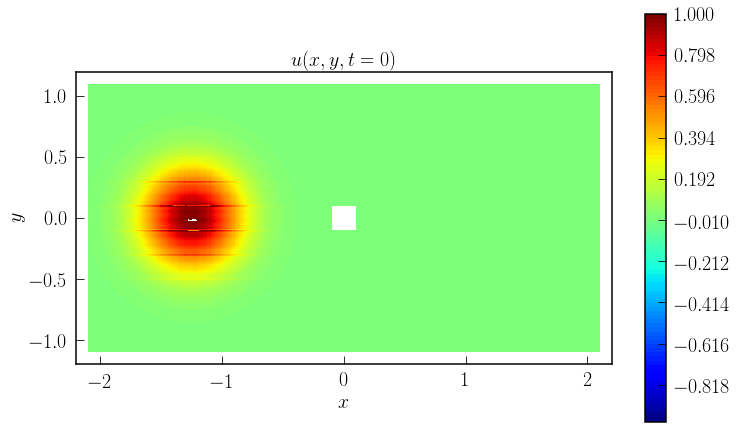

In [30]:
color_levels = np.linspace(-1, 1, 100)

plt.contourf(np.array(x_left), np.array(y_left), np.array(u_left),
             200, levels = color_levels, cmap = 'jet')

plt.contourf(np.array(x_bottom_right), np.array(y_bottom_right), np.array(u_bottom_right),
             200, levels = color_levels, cmap = 'jet')

plt.contourf(np.array(x_top_right), np.array(y_top_right), np.array(u_top_right),
             200, levels = color_levels, cmap = 'jet')

plt.contourf(np.array(x_top_center), np.array(y_top_center), np.array(u_top_center),
             200, levels = color_levels, cmap = 'jet')

plt.contourf(np.array(x_bottom_center), np.array(y_bottom_center), np.array(u_bottom_center),
             200, levels = color_levels, cmap = 'jet')

plt.xlabel(r'$x$')
plt.ylabel(r'$y$')
plt.title(r'$u(x, y, t = 0)$')
plt.axes().set_aspect('equal')
plt.colorbar()

plt.xlim(-2.2, 2.2)
plt.ylim(-1.2, 1.2)
plt.savefig('u_e_ij_t_0000.png')
plt.show()

In [20]:
color_levels = np.linspace(-1.1, 1.1, 100)


element_tags = [44, 53, 62, 99, 140, 149, 158, 207]

for element_tag in np.arange(advec_var.elements.shape[0]):
    print(element_tag)
    x_mesh, y_mesh, u_mesh = contour_x_y_u(element_tag, advec_var)
    
    plt.contourf(np.array(x_mesh), np.array(y_mesh), np.array(u_mesh),
                 200, levels = color_levels, cmap = 'jet')

plt.axes().set_aspect('equal')
plt.colorbar()
plt.show()

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28


KeyboardInterrupt: 